# Read real and generated datasets 

In [7]:
import scanpy as sc
from celldreamer.eval.compute_evaluation_metrics import process_labels, compute_evaluation_metrics
from scipy import sparse
import pandas as pd

In [2]:
def add_to_dict(d, metrics):
    for metric in metrics:
        if metric not in d:
            d[metric] = [metrics[metric]]
        else:
            d[metric]+=[metrics[metric]]
    return d

In [4]:
adata_real_path = "/home/icb/alessandro.palma/environment/celldreamer/project_folder/datasets/processed_full_genome/dentategyrus/dentategyrus_test.h5ad"
adata_real = sc.read_h5ad(adata_real_path)

In [14]:
n_obs = adata_real.shape[0]

In [16]:
results_celldreamer = {}
results_scvi = {} 
results_scdiff = {}

for i in range(3):
    adata_generated_path_celldreamer = f"/home/icb/alessandro.palma/environment/celldreamer/project_folder/datasets/generated/dentategyrus/generated_cells_{i}.h5ad"
    adata_generated_celldreamer = sc.read_h5ad(adata_generated_path_celldreamer)

    adata_generated_path_scvi = f"/home/icb/alessandro.palma/environment/celldreamer/project_folder/baseline_experiments/scvi/dentategyrus/generated/dentategyrus_{i}.h5ad"
    adata_generated_scvi = sc.read_h5ad(adata_generated_path_scvi)
    adata_generated_scvi.X = sparse.csr_matrix(adata_generated_scvi.X)
    adata_generated_scvi = process_labels(adata_real, adata_generated_scvi, "clusters", categorical_obs=True)

    adata_generated_path_scDiffusion = f"/home/icb/alessandro.palma/environment/celldreamer/project_folder/baseline_experiments/scDiffusion/generated/dentategyrus/generated_cells_{i}.h5ad"
    adata_generated_scDiffusion = sc.read_h5ad(adata_generated_path_scDiffusion)[-n_obs:]
    adata_generated_scDiffusion.X = sparse.csr_matrix(adata_generated_scDiffusion.X)
    adata_generated_scDiffusion = process_labels(adata_real, adata_generated_scDiffusion, "clusters", categorical_obs=False)

    results_celldreamer_i = compute_evaluation_metrics(adata_real, adata_generated_celldreamer, "clusters", conditional=True, nn=10)
    results_scvi_i = compute_evaluation_metrics(adata_real, adata_generated_scvi, "clusters", conditional=True, nn=10)
    results_scdiff_i = compute_evaluation_metrics(adata_real, adata_generated_scDiffusion, "clusters", conditional=True, nn=10)

    results_celldreamer = add_to_dict(results_celldreamer, results_celldreamer_i)
    results_scvi = add_to_dict(results_scvi, results_scvi_i)
    results_scdiff = add_to_dict(results_scdiff, results_scdiff_i)

/home/icb/alessandro.palma/environment/celldreamer/celldreamer/eval/compute_evaluation_metrics.py:21: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_generated.obs[category_field] = [labels_dict[int(lab)] for lab in np.array(adata_generated.obs[category_field])]
/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
/home/icb/alessandro.palma/environment/celldreamer/celldreamer/eval/compute_evaluation_metrics.py:36: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata_generated.obsm["X_pca"] = adata_generated.X.A.dot(adata_real.varm["PCs"])


Num real: 3643 Num fake: 3600
Num real: 3643 Num fake: 3600


/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
/home/icb/alessandro.palma/environment/celldreamer/celldreamer/eval/compute_evaluation_metrics.py:36: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata_generated.obsm["X_pca"] = adata_generated.X.A.dot(adata_real.varm["PCs"])


Num real: 3643 Num fake: 3643
Num real: 3643 Num fake: 3643


/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
/home/icb/alessandro.palma/environment/celldreamer/celldreamer/eval/compute_evaluation_metrics.py:36: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata_generated.obsm["X_pca"] = adata_generated.X.A.dot(adata_real.varm["PCs"])


Num real: 3643 Num fake: 3643
Num real: 3643 Num fake: 3643


/home/icb/alessandro.palma/environment/celldreamer/celldreamer/eval/compute_evaluation_metrics.py:21: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_generated.obs[category_field] = [labels_dict[int(lab)] for lab in np.array(adata_generated.obs[category_field])]
/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
/home/icb/alessandro.palma/environment/celldreamer/celldreamer/eval/compute_evaluation_metrics.py:36: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata_generated.obsm["X_pca"] = adata_generated.X.A.dot(adata_real.varm["PCs"])


Num real: 3643 Num fake: 3600
Num real: 3643 Num fake: 3600


/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
/home/icb/alessandro.palma/environment/celldreamer/celldreamer/eval/compute_evaluation_metrics.py:36: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata_generated.obsm["X_pca"] = adata_generated.X.A.dot(adata_real.varm["PCs"])


Num real: 3643 Num fake: 3643
Num real: 3643 Num fake: 3643


/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
/home/icb/alessandro.palma/environment/celldreamer/celldreamer/eval/compute_evaluation_metrics.py:36: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata_generated.obsm["X_pca"] = adata_generated.X.A.dot(adata_real.varm["PCs"])


Num real: 3643 Num fake: 3643
Num real: 3643 Num fake: 3643


/home/icb/alessandro.palma/environment/celldreamer/celldreamer/eval/compute_evaluation_metrics.py:21: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_generated.obs[category_field] = [labels_dict[int(lab)] for lab in np.array(adata_generated.obs[category_field])]
/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
/home/icb/alessandro.palma/environment/celldreamer/celldreamer/eval/compute_evaluation_metrics.py:36: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata_generated.obsm["X_pca"] = adata_generated.X.A.dot(adata_real.varm["PCs"])


Num real: 3643 Num fake: 3600
Num real: 3643 Num fake: 3600


/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
/home/icb/alessandro.palma/environment/celldreamer/celldreamer/eval/compute_evaluation_metrics.py:36: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata_generated.obsm["X_pca"] = adata_generated.X.A.dot(adata_real.varm["PCs"])


Num real: 3643 Num fake: 3643
Num real: 3643 Num fake: 3643


/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
/home/icb/alessandro.palma/environment/celldreamer/celldreamer/eval/compute_evaluation_metrics.py:36: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata_generated.obsm["X_pca"] = adata_generated.X.A.dot(adata_real.varm["PCs"])


Num real: 3643 Num fake: 3643
Num real: 3643 Num fake: 3643


In [18]:
results_celldreamer_df = pd.DataFrame(results_celldreamer)
results_scvi_df = pd.DataFrame(results_scvi)
results_scdiff_df = pd.DataFrame(results_scdiff)

In [19]:
results_celldreamer_df.mean(0)

1-Wasserstein_PCA        22.151223
2-Wasserstein_PCA        22.236731
Linear_MMD_PCA          439.083455
Poly_MMD_PCA         184227.270833
1-Wasserstein            26.232225
2-Wasserstein            26.407928
Linear_MMD               11.847965
Poly_MMD              19415.072917
KNN identity              0.349444
KNN identity PCA          0.000463
precision                 0.411111
recall                    0.698051
density                   0.622991
coverage                  0.840882
precision_PCA             0.000370
recall_PCA                0.404703
density_PCA               0.000046
coverage_PCA              0.000366
KNN category              0.764630
KNN category PCA          0.277593
dtype: float64

In [20]:
results_scvi_df.mean(0)

1-Wasserstein_PCA        23.162065
2-Wasserstein_PCA        23.243720
Linear_MMD_PCA          482.666667
Poly_MMD_PCA         231048.359375
1-Wasserstein            25.877088
2-Wasserstein            26.088684
Linear_MMD                3.590211
Poly_MMD               6224.020833
KNN identity              0.097905
KNN identity PCA          0.000000
precision                 0.536463
recall                    0.704273
density                   0.712261
coverage                  0.971818
precision_PCA             0.000091
recall_PCA                0.000000
density_PCA               0.000009
coverage_PCA              0.000091
KNN category              0.735932
KNN category PCA          0.246134
dtype: float64

In [22]:
results_scdiff_df.mean(0)

1-Wasserstein_PCA        23.295973
2-Wasserstein_PCA        23.355702
Linear_MMD_PCA          633.567647
Poly_MMD_PCA         445586.802083
1-Wasserstein            22.209516
2-Wasserstein            22.322123
Linear_MMD              146.481196
Poly_MMD             253656.291667
KNN identity              0.000640
KNN identity PCA          0.000000
precision                 0.992040
recall                    0.004483
density                  14.927203
coverage                  0.998719
precision_PCA             0.000000
recall_PCA                0.000000
density_PCA               0.000000
coverage_PCA              0.000000
KNN category              0.783695
KNN category PCA          0.252082
dtype: float64

In [23]:
pd.read_csv("/home/icb/alessandro.palma/environment/celldreamer/experiments/results/pbmc3k/celldreamer_pbmc3k")

,Unnamed: 0,1-Wasserstein_PCA,2-Wasserstein_PCA,Linear_MMD_PCA,Poly_MMD_PCA,1-Wasserstein,2-Wasserstein,Linear_MMD,Poly_MMD,KNN identity,...,precision,recall,density,coverage,precision_PCA,recall_PCA,density_PCA,coverage_PCA,KNN category,KNN category PCA
0,0,18.315600,18.465690,211.817627,42820.855469,32.361063,32.454344,8.370586,9918.515625,0.070076,...,0.282197,0.191288,1.376326,0.998106,0.782197,0.001894,0.372348,0.297348,0.734848,0.727273
1,1,18.196357,18.347322,208.544174,41018.515625,32.340313,32.429042,9.680903,12530.203125,0.136364,...,0.348485,0.196970,1.320833,0.977273,0.767045,0.000000,0.385038,0.306818,0.721591,0.712121
2,2,18.124520,18.265584,204.447754,39896.429688,32.267983,32.354906,8.089196,10292.875000,0.111742,...,0.348485,0.210227,1.474242,0.986742,0.789773,0.003788,0.432765,0.339015,0.727273,0.751894


In [38]:
adata_generated_path_scDiffusion = f"/home/icb/alessandro.palma/environment/celldreamer/project_folder/baseline_experiments/scDiffusion/generated/c_elegans/generated_cells_2.h5ad"
adata = sc.read_h5ad(adata_generated_path_scDiffusion)
adata.obs["cell_type"] = adata.obs["tissue"]
adata.write_h5ad(adata_generated_path_scDiffusion)

In [33]:
sc.pp.neighbors(adata)

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/pynndescent/pynndescent_.py:346: NumbaPendingDeprecationWarning: Code using Numba extension API maybe depending on 'old_style' error-capturing, which is deprecated and will be replaced by 'new_style' in a future release. See details at https://numba.readthedocs.io/en/latest/reference/deprecation.html#deprecation-of-old-style-numba-captured-errors
Exception origin:
  File "/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/numba/core/types/functions.py", line 486, in __getnewargs__
    raise ReferenceError("underlying object has vanished")

  init_rp_tree(data, dist, current_graph, leaf_array)
/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/pynndescent/pynndescent_.py:348: NumbaPendingDeprecationWarning: Code using Numba extension API maybe depending on 'old_style' error-capturing, which is deprecated and will be replaced by 'new_style'

In [34]:
sc.tl.umap(adata)

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


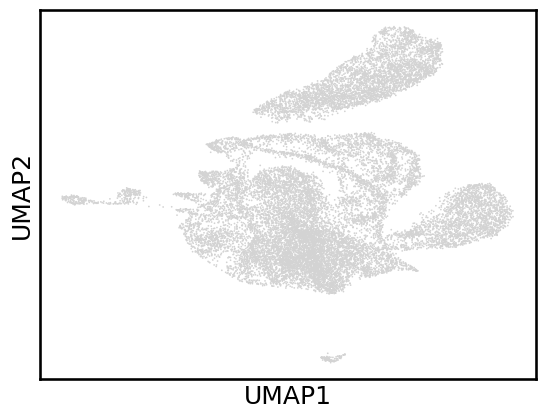

In [35]:
sc.pl.umap(adata)